In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
df = pd.read_csv("../data/processed/scraped_cian_processed.csv")
df

In [ ]:
df.groupby('author_type')['price'].mean().reset_index()

In [ ]:
average_price_by_author = df.groupby('author_type')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(average_price_by_author['author_type'], average_price_by_author['price'], color='skyblue')
plt.xlabel('Author Type')
plt.ylabel('Average Price')
plt.title('Average Price by Author Type')
plt.xticks(rotation=45)
plt.show()

In [ ]:
avg_price_per_meter = df.groupby("author_type")['price_for_a_meter'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(avg_price_per_meter['author_type'], avg_price_per_meter['price_for_a_meter'], color='skyblue')
plt.xlabel('Author Type')
plt.ylabel('Average Price per meter')
plt.title('Average Price by Author Type')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import scipy.stats as stats

In [ ]:
# Create subsets of data based on author type
grouped_data = df.groupby('author_type')['price_for_a_meter']

# Perform ANOVA test
f_val, p_val = stats.f_oneway(*[group for name, group in grouped_data])

print('F-value:', f_val)
print('P-value:', p_val)

In [ ]:
import pandas as pd
import scipy.stats as stats

# Convert 'price_for_a_meter' into a categorical variable
df['price_for_a_meter_cat'] = pd.cut(df['price_for_a_meter'], bins=10)

# Create a cross table
cross_table = pd.crosstab(df['price_for_a_meter_cat'], df['author_type'])

# Perform Chi-Square test of independence
chi2_statistic, p_value, degrees_of_freedom, expected_freq = stats.chi2_contingency(cross_table)

alpha = 0.01

# Check the hypothesis
if p_value < alpha:
    print("The hypothesis of independence is rejected.")
else:
    print("The hypothesis of independence is not rejected.")

p_value

In [ ]:
import scipy.stats as stats

# Get all unique categories in 'underground' and 'district'
underground_categories = df['underground'].unique()
district_categories = df['district'].unique()

# Perform ANOVA test for 'underground'
underground_groups = [df['price'][df['underground'] == category] for category in underground_categories]
fvalue, p_value = stats.f_oneway(*underground_groups)
print("Results for 'underground': F=", fvalue, ", P =", p_value)

# Perform ANOVA test for 'district'
district_groups = [df['price'][df['district'] == category] for category in district_categories]
fvalue, p_value = stats.f_oneway(*district_groups)
print("Results for 'district': F=", fvalue, ", P =", p_value)

In [ ]:
data = df.groupby('underground')['price'].mean().reset_index()
data

In [ ]:
groups = [df[df['underground'] == station]['price'].values for station in df['underground'].unique() if len(df[df['underground'] == station]) > 1]

In [ ]:
anova_result = st.f_oneway(*groups)

In [ ]:
print(anova_result.pvalue<0.05)

In [ ]:
street_groups = [df[df['street'] == street]['price'].values for street in df['street'].unique() if len(df[df['street'] == street]) > 1]

# Perform one-way ANOVA test on the street groups
anova_street_result = stats.f_oneway(*street_groups)

In [ ]:
anova_street_result

In [ ]:
df.groupby('author_type')['price'].mean().reset_index()

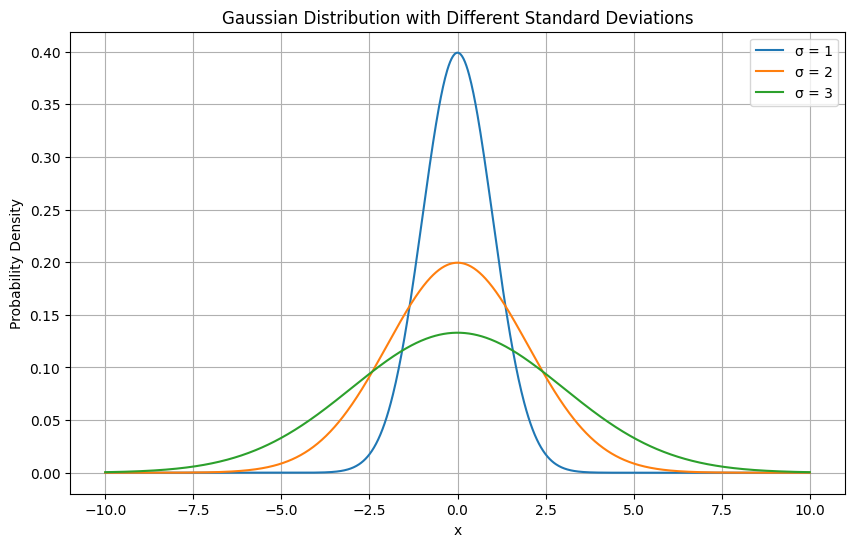

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Среднее значение
mu = 0

# Диапазон значений для x
x = np.linspace(-10, 10, 1000)

# Стандартные отклонения
sigmas = [1, 2, 3]

# Плотности вероятности для различных стандартных отклонений
pdfs = [1/(np.sqrt(2*np.pi*sigma**2)) * np.exp(-(x - mu)**2 / (2 * sigma**2)) for sigma in sigmas]

# Построение графиков
plt.figure(figsize=(10, 6))
for sigma, pdf in zip(sigmas, pdfs):
    plt.plot(x, pdf, label=f'σ = {sigma}')

plt.title('Gaussian Distribution with Different Standard Deviations')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()